# Lesson 12 

### Import the Necessary Librabies

In [569]:
import pandas as pd

In [570]:
from matplotlib import pyplot as plt

In [571]:
import seaborn as sns

## Data Cleaning and Preparation: (10 marks)

### Load the sales data into a DataFrame.

In [572]:
sales_data_df = pd.read_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\sales_data.csv')
sales_data_df.head()

,Date,Product,Region,Sales
0,2023-11-16,Product C,West,854.36
1,2023-07-14,Product B,West,156.62
2,2023-09-22,Product E,South,958.96
3,2022-07-12,Product D,North,234.06
4,2023-12-09,Product D,West,239.93


In [573]:
sales_data_df.tail()

,Date,Product,Region,Sales
995,2023-04-16,Product C,North,786.29
996,2022-07-05,Product B,North,594.40
997,2022-12-16,Product C,West,421.18
998,2023-09-07,Product B,North,602.47
999,2023-12-20,Product A,East,896.52


In [574]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1000 non-null   object 
 1   Product  1000 non-null   object 
 2   Region   1000 non-null   object 
 3   Sales    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [575]:
sales_data_df.describe()

,Sales
count,1000.000000
mean,557.555530
std,260.372107
min,100.170000
25%,330.962500
50%,555.835000
75%,786.125000
max,999.290000


In [576]:
print('This Dataframe has ',sales_data_df.shape[0],' Observations and ',sales_data_df.shape[1],' Fields')

This Dataframe has  1000  Observations and  4  Fields


### Convert Date column from Object to Date Data type

In [577]:
sales_data_df['Date'] = pd.to_datetime(sales_data_df['Date'])

#### Confirm change

In [578]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1000 non-null   datetime64[ns]
 1   Product  1000 non-null   object        
 2   Region   1000 non-null   object        
 3   Sales    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 31.4+ KB


### Create new columns if necessary (e.g., month, quarter).

In [579]:
sales_data_df['Month'] = sales_data_df['Date'].dt.month

In [580]:
sales_data_df['Quarter'] = sales_data_df['Date'].dt.to_period('Q')

#### View new columns

In [581]:
sales_data_df.head()

,Date,Product,Region,Sales,Month,Quarter
0,2023-11-16,Product C,West,854.36,11,2023Q4
1,2023-07-14,Product B,West,156.62,7,2023Q3
2,2023-09-22,Product E,South,958.96,9,2023Q3
3,2022-07-12,Product D,North,234.06,7,2022Q3
4,2023-12-09,Product D,West,239.93,12,2023Q4


In [582]:
temp_sale_df = sales_data_df
temp_sale_df.set_index('Date', inplace=True)

## Sales Trend Analysis: (10 marks)

#### Group Monthly Sales 

In [583]:
monthly_sales = temp_sale_df['Sales'].resample('M').sum()
monthly_sales = monthly_sales.reset_index()

### Create a line chart to visualize the monthly sales trend over the last two years.

c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


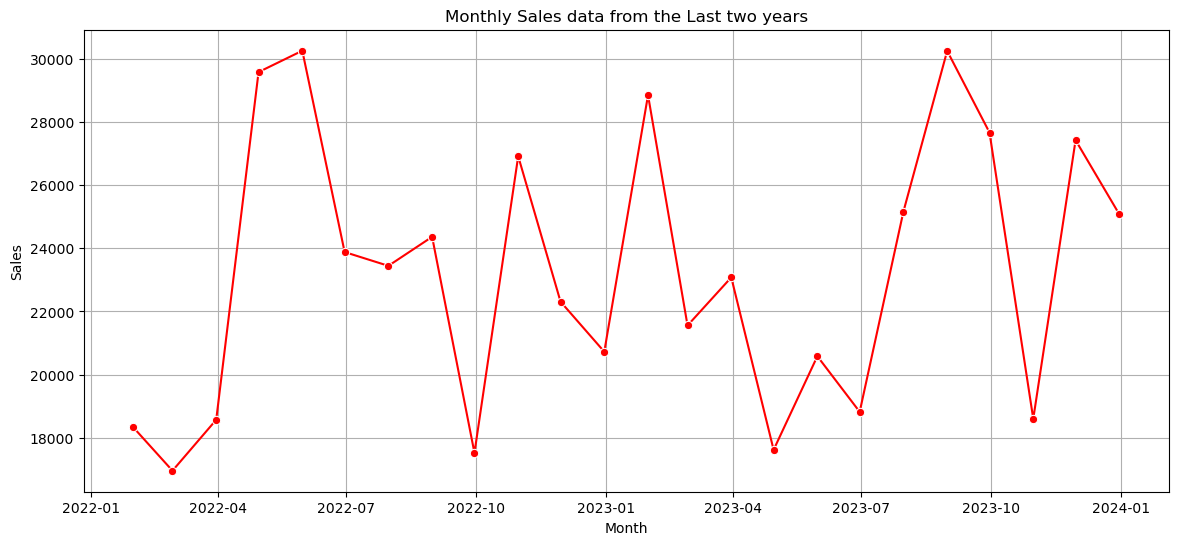

In [584]:
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o', color= 'r')
plt.title('Monthly Sales data from the Last two years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Highlight any significant trends or anomalies.

## Product Performance: (10 marks)

### Create a bar chart to compare the total sales of different products.

In [585]:
product_sales = temp_sale_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

In [586]:
temp_sale_df.head()

,Product,Region,Sales,Month,Quarter
Date,,,,,
2023-11-16,Product C,West,854.36,11,2023Q4
2023-07-14,Product B,West,156.62,7,2023Q3
2023-09-22,Product E,South,958.96,9,2023Q3
2022-07-12,Product D,North,234.06,7,2022Q3
2023-12-09,Product D,West,239.93,12,2023Q4


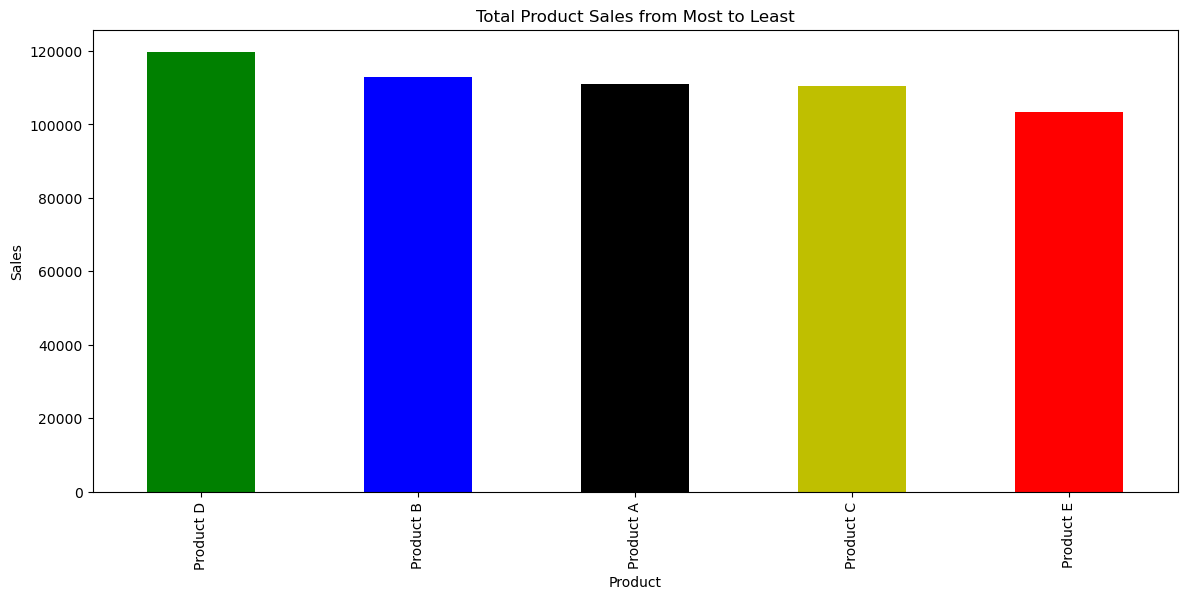

In [587]:
plt.figure(figsize=(14,6))
product_sales.plot(kind='bar',color=['green','blue','k','y','r'])
plt.title('Total Product Sales from Most to Least')
plt.ylabel('Sales')
plt.xlabel('Product')
plt.show()

In [588]:
print(product_sales)

Product
Product D    119782.91
Product B    112842.51
Product A    111085.68
Product C    110456.77
Product E    103387.66
Name: Sales, dtype: float64


### Identify the top-performing and least-performing products.

##### The Top-Perfroming Product is Product D

##### The Least-Perfroming Prdouct is Product E

## Regional Sales Analysis: (10 marks)

In [589]:
# Group by region to get total sales per region
region_sales = temp_sale_df.groupby('Region')['Sales'].sum()


In [590]:
region_sales

Region
East     140211.69
North    131973.83
South    138214.37
West     147155.64
Name: Sales, dtype: float64

In [591]:
# Assuming sales_df is your DataFrame
# Group by region and calculate total sales per region using pivot_table
region_sales = temp_sale_df.pivot_table(values='Sales', index='Region', aggfunc='sum').reset_index()

# Pivot the DataFrame for heatmap
pivot_table = region_sales.pivot(index='Region', columns='Sales', values='Sales')

### Create a heatmap to visualize the sales distribution across different regions.


c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


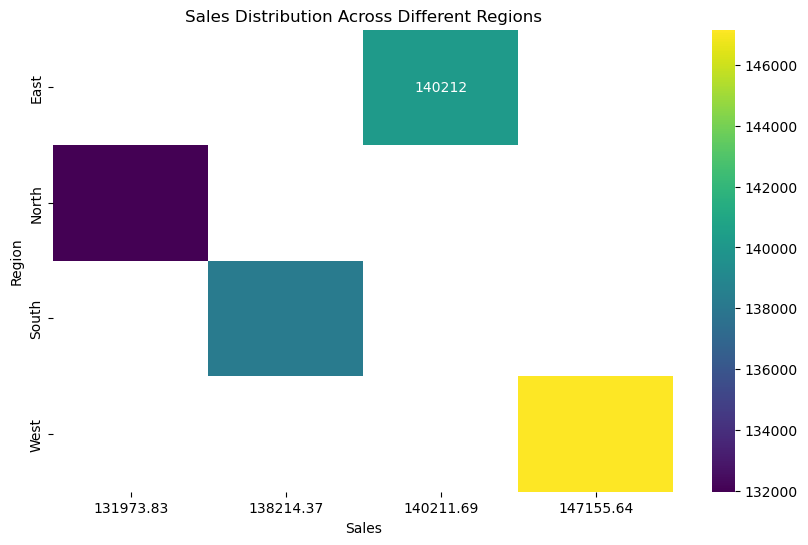

In [592]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap='viridis')
plt.title('Sales Distribution Across Different Regions')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

### Analyze regional performance and provide insights.